In [1]:
#FBProphet model

In [2]:
#https://www.geeksforgeeks.org/time-series-analysis-using-facebook-prophet/

In [3]:
#refer this video link before proceeding:
#             https://www.youtube.com/watch?v=2vF2xTUXJwM            

In [4]:
#!pip install prophet

In [5]:
#pip install nest-asyncio

In [2]:
import pystan

In [7]:
#!pip install  cmdstanpy==1.0.4

In [8]:
#!pip install fbprophet

In [3]:
from fbprophet import Prophet

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


In [4]:
import pandas as pd
import numpy as np

In [5]:
from prophet.plot import plot_plotly, plot_components_plotly

In [6]:
df=pd.read_csv("Gold_data.csv")

In [7]:
df.head(5)

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2182 non-null   object 
 1   price   2182 non-null   float64
dtypes: float64(1), object(1)
memory usage: 34.2+ KB


In [9]:
df.shape

(2182, 2)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape  # no duplicates

(2182, 2)

In [12]:
df.isna().sum()

date     0
price    0
dtype: int64

In [13]:
# converting date to timestamp:
df["date"]=pd.to_datetime(df["date"])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2182 non-null   datetime64[ns]
 1   price   2182 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 51.1 KB


In [15]:
# fbprophet needs date column name as ds and other column i.e price as y:
df.columns=['ds','y']

In [16]:
df.head(2)

,ds,y
0,2016-01-01,2252.6
1,2016-01-02,2454.5


In [ ]:
#plotting the original data: 
import matplotlib.pyplot as plt
df.plot(x="ds",y='y',figsize=(18,9))
plt.xlabel("days")
plt.ylabel("price")
plt.show()

## Splitting data:


In [ ]:
len(df)

In [ ]:
train=df.iloc[:len(df)-182]
test=df.iloc[len(df)-182:]

In [ ]:
train

In [ ]:
test

In [ ]:
train.shape

In [ ]:
test.shape

In [97]:
# initializing the model:
model=Prophet()

In [98]:
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [99]:
future = model.make_future_dataframe(periods=182) #MS for monthly, H for hourly

In [100]:
future
#gets appended to the train 

,ds
0,2016-01-01
1,2016-01-02
2,2016-01-03
3,2016-01-04
4,2016-01-05
...,...
2177,2021-12-17
2178,2021-12-18
2179,2021-12-19
2180,2021-12-20


In [101]:
train.tail(1)

,ds,y
1999,2021-06-22,4232.7


In [102]:
len(future),len(train)

(2182, 2000)

In [103]:
forecast=model.predict(future)

In [104]:
forecast
# look at yhat column only.........

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,2596.061483,2411.147720,2841.346316,2596.061483,2596.061483,31.599593,31.599593,31.599593,-2.313321,-2.313321,-2.313321,33.912914,33.912914,33.912914,0.0,0.0,0.0,2627.661076
1,2016-01-02,2596.835292,2422.094308,2864.804500,2596.835292,2596.835292,40.937359,40.937359,40.937359,1.154713,1.154713,1.154713,39.782646,39.782646,39.782646,0.0,0.0,0.0,2637.772651
2,2016-01-03,2597.609101,2423.933233,2854.642717,2597.609101,2597.609101,43.089328,43.089328,43.089328,-1.442461,-1.442461,-1.442461,44.531789,44.531789,44.531789,0.0,0.0,0.0,2640.698429
3,2016-01-04,2598.382910,2426.203068,2858.221897,2598.382910,2598.382910,46.585954,46.585954,46.585954,-1.531447,-1.531447,-1.531447,48.117400,48.117400,48.117400,0.0,0.0,0.0,2644.968863
4,2016-01-05,2599.156719,2431.844837,2875.101945,2599.156719,2599.156719,51.932690,51.932690,51.932690,1.412666,1.412666,1.412666,50.520024,50.520024,50.520024,0.0,0.0,0.0,2651.089409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,2021-12-17,4315.878689,3958.793904,4446.039059,4199.208559,4416.289482,-106.569020,-106.569020,-106.569020,-2.313321,-2.313321,-2.313321,-104.255699,-104.255699,-104.255699,0.0,0.0,0.0,4209.309668
2178,2021-12-18,4315.902533,3967.593820,4473.859532,4198.345357,4417.230148,-95.265910,-95.265910,-95.265910,1.154713,1.154713,1.154713,-96.420623,-96.420623,-96.420623,0.0,0.0,0.0,4220.636623
2179,2021-12-19,4315.926377,3954.708492,4491.152683,4197.509450,4418.307497,-89.168715,-89.168715,-89.168715,-1.442461,-1.442461,-1.442461,-87.726254,-87.726254,-87.726254,0.0,0.0,0.0,4226.757662
2180,2021-12-20,4315.950221,3973.689880,4473.903784,4196.673544,4419.260543,-79.823637,-79.823637,-79.823637,-1.531447,-1.531447,-1.531447,-78.292190,-78.292190,-78.292190,0.0,0.0,0.0,4236.126584


In [105]:
forecast[["ds","yhat_lower","yhat_upper","yhat"]]

,ds,yhat_lower,yhat_upper,yhat
0,2016-01-01,2411.147720,2841.346316,2627.661076
1,2016-01-02,2422.094308,2864.804500,2637.772651
2,2016-01-03,2423.933233,2854.642717,2640.698429
3,2016-01-04,2426.203068,2858.221897,2644.968863
4,2016-01-05,2431.844837,2875.101945,2651.089409
...,...,...,...,...
2177,2021-12-17,3958.793904,4446.039059,4209.309668
2178,2021-12-18,3967.593820,4473.859532,4220.636623
2179,2021-12-19,3954.708492,4491.152683,4226.757662
2180,2021-12-20,3973.689880,4473.903784,4236.126584


In [106]:
test.head()

,ds,y
2000,2021-06-23,4232.3
2001,2021-06-24,4225.8
2002,2021-06-25,4238.9
2003,2021-06-26,4242.3
2004,2021-06-27,4244.4


In [107]:
test.tail()

,ds,y
2177,2021-12-17,4394.4
2178,2021-12-18,4389.5
2179,2021-12-19,4389.5
2180,2021-12-20,4354.1
2181,2021-12-21,4346.5


In [108]:
model

In [109]:
plot_plotly(model,forecast)

In [110]:
plot_components_plotly(model,forecast)

In [111]:
train

,ds,y
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
1995,2021-06-18,4195.30
1996,2021-06-19,4199.70
1997,2021-06-20,4199.70
1998,2021-06-21,4243.20


In [112]:
test

,ds,y
2000,2021-06-23,4232.3
2001,2021-06-24,4225.8
2002,2021-06-25,4238.9
2003,2021-06-26,4242.3
2004,2021-06-27,4244.4
...,...,...
2177,2021-12-17,4394.4
2178,2021-12-18,4389.5
2179,2021-12-19,4389.5
2180,2021-12-20,4354.1


In [113]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,2596.061483,2411.147720,2841.346316,2596.061483,2596.061483,31.599593,31.599593,31.599593,-2.313321,-2.313321,-2.313321,33.912914,33.912914,33.912914,0.0,0.0,0.0,2627.661076
1,2016-01-02,2596.835292,2422.094308,2864.804500,2596.835292,2596.835292,40.937359,40.937359,40.937359,1.154713,1.154713,1.154713,39.782646,39.782646,39.782646,0.0,0.0,0.0,2637.772651
2,2016-01-03,2597.609101,2423.933233,2854.642717,2597.609101,2597.609101,43.089328,43.089328,43.089328,-1.442461,-1.442461,-1.442461,44.531789,44.531789,44.531789,0.0,0.0,0.0,2640.698429
3,2016-01-04,2598.382910,2426.203068,2858.221897,2598.382910,2598.382910,46.585954,46.585954,46.585954,-1.531447,-1.531447,-1.531447,48.117400,48.117400,48.117400,0.0,0.0,0.0,2644.968863
4,2016-01-05,2599.156719,2431.844837,2875.101945,2599.156719,2599.156719,51.932690,51.932690,51.932690,1.412666,1.412666,1.412666,50.520024,50.520024,50.520024,0.0,0.0,0.0,2651.089409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,2021-12-17,4315.878689,3958.793904,4446.039059,4199.208559,4416.289482,-106.569020,-106.569020,-106.569020,-2.313321,-2.313321,-2.313321,-104.255699,-104.255699,-104.255699,0.0,0.0,0.0,4209.309668
2178,2021-12-18,4315.902533,3967.593820,4473.859532,4198.345357,4417.230148,-95.265910,-95.265910,-95.265910,1.154713,1.154713,1.154713,-96.420623,-96.420623,-96.420623,0.0,0.0,0.0,4220.636623
2179,2021-12-19,4315.926377,3954.708492,4491.152683,4197.509450,4418.307497,-89.168715,-89.168715,-89.168715,-1.442461,-1.442461,-1.442461,-87.726254,-87.726254,-87.726254,0.0,0.0,0.0,4226.757662
2180,2021-12-20,4315.950221,3973.689880,4473.903784,4196.673544,4419.260543,-79.823637,-79.823637,-79.823637,-1.531447,-1.531447,-1.531447,-78.292190,-78.292190,-78.292190,0.0,0.0,0.0,4236.126584


In [115]:
forecast["yhat"][-182:]

2000    4308.660610
2001    4311.720870
2002    4312.349088
2003    4319.564314
2004    4320.506363
           ...     
2177    4209.309668
2178    4220.636623
2179    4226.757662
2180    4236.126584
2181    4249.133160
Name: yhat, Length: 182, dtype: float64

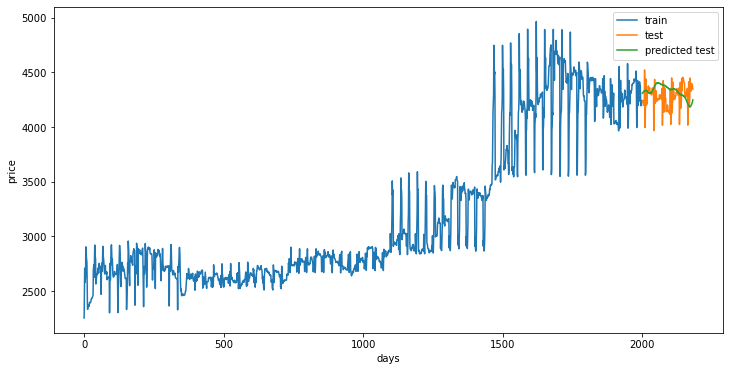

In [116]:
train["y"].plot(legend=True, label="train",figsize=(12,6))
test["y"].plot(legend=True, label="test")
forecast["yhat"][-182:].plot(legend=True,label="predicted test")
plt.xlabel("days")
plt.ylabel("price")
plt.show()

In [128]:
len(forecast["yhat"][-182:])

182

In [129]:
len(test)

182

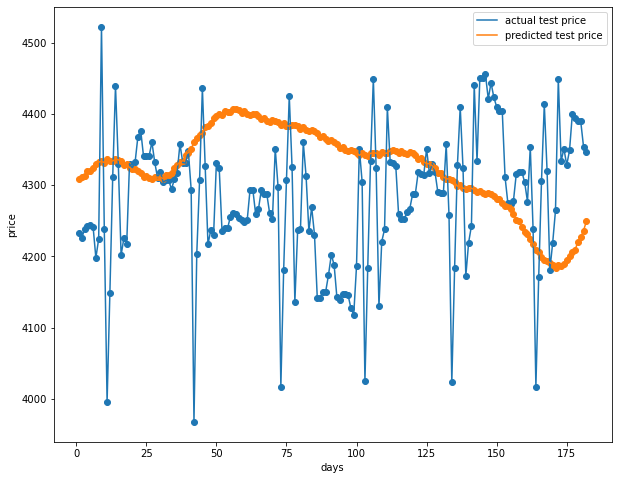

In [136]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(np.arange(1,len(test)+1),test["y"])
plt.plot(np.arange(1,len(test)+1),test["y"])

plt.scatter(np.arange(1,len(test)+1),forecast["yhat"][-182:])
plt.plot(np.arange(1,len(test)+1),forecast["yhat"][-182:])
plt.xlabel("days")
plt.ylabel("price")
plt.legend(["actual test price","predicted test price"])

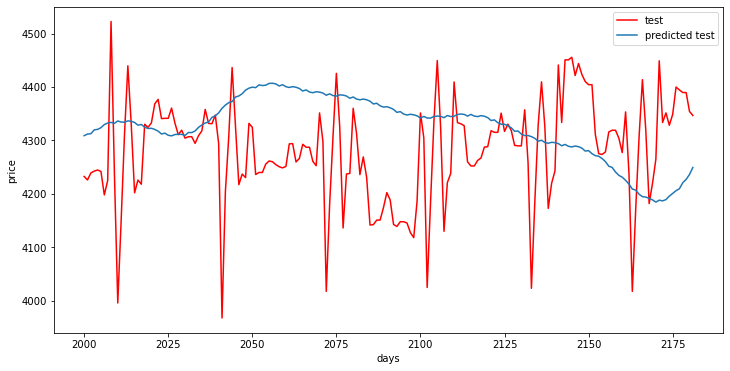

In [122]:
#train["y"].plot(legend=True, label="train",figsize=(12,6))
test["y"].plot(legend=True, label="test",figsize=(12,6),c="r")
forecast["yhat"][-182:].plot(legend=True,label="predicted test")
plt.xlabel("days")
plt.ylabel("price")
plt.show()

In [49]:
# evaluating the model:
from statsmodels.tools.eval_measures import rmse

In [50]:
predictions=forecast.iloc[-182:]["yhat"]

In [51]:
predictions.head(20)

2000    4308.660610
2001    4311.720870
2002    4312.349088
2003    4319.564314
2004    4320.506363
2005    4323.672246
2006    4329.517708
2007    4332.380590
2008    4333.550205
2009    4331.830456
2010    4336.301246
2011    4334.174503
2012    4334.028705
2013    4336.408257
2014    4335.744477
2015    4333.422473
2016    4328.341689
2017    4329.674746
2018    4324.720978
2019    4322.138609
Name: yhat, dtype: float64

In [52]:
print("rmse is:",rmse(test["y"],predictions))
print("Mean value of test dataset is:",test["y"].mean())

rmse is: 129.37206472899683
Mean value of test dataset is: 4281.391208791207


In [53]:
test["y"].std()

94.20525685716919

BUILDING THE FINAL MODEL:


In [138]:
df

,ds,y
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [139]:
model=Prophet()

In [140]:
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [141]:
future = model.make_future_dataframe(periods=200)

In [142]:
future

,ds
0,2016-01-01
1,2016-01-02
2,2016-01-03
3,2016-01-04
4,2016-01-05
...,...
2377,2022-07-05
2378,2022-07-06
2379,2022-07-07
2380,2022-07-08


In [143]:
forecast=model.predict(future)

In [144]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,2595.101560,2411.209890,2858.788869,2595.101560,2595.101560,30.464723,30.464723,30.464723,-3.695019,-3.695019,-3.695019,34.159742,34.159742,34.159742,0.0,0.0,0.0,2625.566283
1,2016-01-02,2595.831958,2424.412239,2858.055971,2595.831958,2595.831958,40.009219,40.009219,40.009219,1.159670,1.159670,1.159670,38.849550,38.849550,38.849550,0.0,0.0,0.0,2635.841177
2,2016-01-03,2596.562356,2422.882135,2834.135543,2596.562356,2596.562356,41.152141,41.152141,41.152141,-1.389921,-1.389921,-1.389921,42.542062,42.542062,42.542062,0.0,0.0,0.0,2637.714497
3,2016-01-04,2597.292754,2421.246628,2858.915412,2597.292754,2597.292754,45.397637,45.397637,45.397637,0.188023,0.188023,0.188023,45.209614,45.209614,45.209614,0.0,0.0,0.0,2642.690392
4,2016-01-05,2598.023153,2428.063695,2858.690715,2598.023153,2598.023153,48.024935,48.024935,48.024935,1.179863,1.179863,1.179863,46.845072,46.845072,46.845072,0.0,0.0,0.0,2646.048088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,2022-07-05,4211.303611,3977.790916,4470.932391,4111.890632,4303.538688,16.059941,16.059941,16.059941,1.179863,1.179863,1.179863,14.880078,14.880078,14.880078,0.0,0.0,0.0,4227.363552
2378,2022-07-06,4211.088460,3974.547815,4480.471506,4111.104613,4304.008110,15.511127,15.511127,15.511127,0.888169,0.888169,0.888169,14.622958,14.622958,14.622958,0.0,0.0,0.0,4226.599587
2379,2022-07-07,4210.873309,3983.138737,4461.825904,4110.486338,4304.536751,15.694726,15.694726,15.694726,1.669215,1.669215,1.669215,14.025511,14.025511,14.025511,0.0,0.0,0.0,4226.568035
2380,2022-07-08,4210.658158,3980.807099,4460.980428,4109.868064,4305.142815,9.418003,9.418003,9.418003,-3.695019,-3.695019,-3.695019,13.113022,13.113022,13.113022,0.0,0.0,0.0,4220.076161


In [145]:
df.tail()

,ds,y
2177,2021-12-17,4394.4
2178,2021-12-18,4389.5
2179,2021-12-19,4389.5
2180,2021-12-20,4354.1
2181,2021-12-21,4346.5


In [146]:
len(df)

2182

In [147]:
predictions=forecast.iloc[-200:][["ds","yhat"]]

In [148]:
predictions

,ds,yhat
2182,2021-12-22,4209.988606
2183,2021-12-23,4220.064867
2184,2021-12-24,4224.046319
2185,2021-12-25,4238.149360
2186,2021-12-26,4244.604939
...,...,...
2377,2022-07-05,4227.363552
2378,2022-07-06,4226.599587
2379,2022-07-07,4226.568035
2380,2022-07-08,4220.076161


In [149]:
predictions["yhat"]=predictions["yhat"].round(2)

In [150]:
predictions

,ds,yhat
2182,2021-12-22,4209.99
2183,2021-12-23,4220.06
2184,2021-12-24,4224.05
2185,2021-12-25,4238.15
2186,2021-12-26,4244.60
...,...,...
2377,2022-07-05,4227.36
2378,2022-07-06,4226.60
2379,2022-07-07,4226.57
2380,2022-07-08,4220.08


In [151]:
plot_plotly(model,forecast)

In [159]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,2595.101560,2411.209890,2858.788869,2595.101560,2595.101560,30.464723,30.464723,30.464723,-3.695019,-3.695019,-3.695019,34.159742,34.159742,34.159742,0.0,0.0,0.0,2625.566283
1,2016-01-02,2595.831958,2424.412239,2858.055971,2595.831958,2595.831958,40.009219,40.009219,40.009219,1.159670,1.159670,1.159670,38.849550,38.849550,38.849550,0.0,0.0,0.0,2635.841177
2,2016-01-03,2596.562356,2422.882135,2834.135543,2596.562356,2596.562356,41.152141,41.152141,41.152141,-1.389921,-1.389921,-1.389921,42.542062,42.542062,42.542062,0.0,0.0,0.0,2637.714497
3,2016-01-04,2597.292754,2421.246628,2858.915412,2597.292754,2597.292754,45.397637,45.397637,45.397637,0.188023,0.188023,0.188023,45.209614,45.209614,45.209614,0.0,0.0,0.0,2642.690392
4,2016-01-05,2598.023153,2428.063695,2858.690715,2598.023153,2598.023153,48.024935,48.024935,48.024935,1.179863,1.179863,1.179863,46.845072,46.845072,46.845072,0.0,0.0,0.0,2646.048088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,2022-07-05,4211.303611,3977.790916,4470.932391,4111.890632,4303.538688,16.059941,16.059941,16.059941,1.179863,1.179863,1.179863,14.880078,14.880078,14.880078,0.0,0.0,0.0,4227.363552
2378,2022-07-06,4211.088460,3974.547815,4480.471506,4111.104613,4304.008110,15.511127,15.511127,15.511127,0.888169,0.888169,0.888169,14.622958,14.622958,14.622958,0.0,0.0,0.0,4226.599587
2379,2022-07-07,4210.873309,3983.138737,4461.825904,4110.486338,4304.536751,15.694726,15.694726,15.694726,1.669215,1.669215,1.669215,14.025511,14.025511,14.025511,0.0,0.0,0.0,4226.568035
2380,2022-07-08,4210.658158,3980.807099,4460.980428,4109.868064,4305.142815,9.418003,9.418003,9.418003,-3.695019,-3.695019,-3.695019,13.113022,13.113022,13.113022,0.0,0.0,0.0,4220.076161


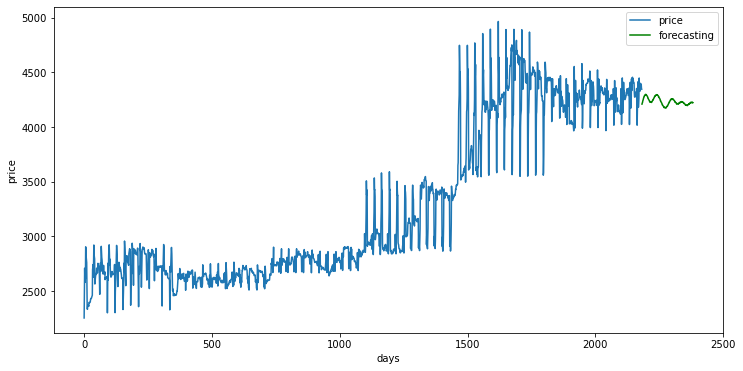

In [152]:
df["y"].plot(legend=True, label="price",figsize=(12,6))
forecast["yhat"][-200:].plot(legend=True, label="forecasting",c="g")
plt.xlabel("days")
plt.ylabel("price")
plt.show()

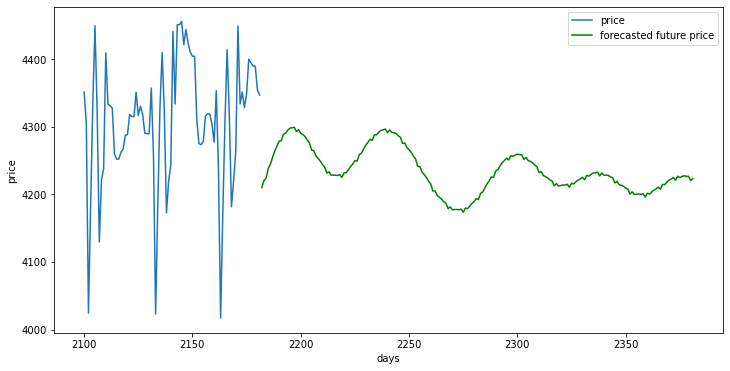

In [158]:
df["y"][2100:].plot(legend=True, label="price",figsize=(12,6))
forecast["yhat"][-200:].plot(legend=True, label="forecasted future price",c="g")
#plt.xticks(np.arange(2000,2187))
plt.xlabel("days")
plt.ylabel("price")
plt.show()

In [68]:
#deployment:

In [69]:
df

,ds,y
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [70]:
model=Prophet()

In [71]:
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [72]:
future = model.make_future_dataframe(periods=200)

In [73]:
future

,ds
0,2016-01-01
1,2016-01-02
2,2016-01-03
3,2016-01-04
4,2016-01-05
...,...
2377,2022-07-05
2378,2022-07-06
2379,2022-07-07
2380,2022-07-08


In [74]:
forecast=model.predict(future)

In [75]:
predictions=forecast.iloc[-200:][["ds","yhat"]]

In [76]:
predictions

,ds,yhat
2182,2021-12-22,4209.988606
2183,2021-12-23,4220.064867
2184,2021-12-24,4224.046319
2185,2021-12-25,4238.149360
2186,2021-12-26,4244.604939
...,...,...
2377,2022-07-05,4227.363552
2378,2022-07-06,4226.599587
2379,2022-07-07,4226.568035
2380,2022-07-08,4220.076161


In [77]:
gg=predictions["yhat"]

In [78]:
gg

2182    4209.988606
2183    4220.064867
2184    4224.046319
2185    4238.149360
2186    4244.604939
           ...     
2377    4227.363552
2378    4226.599587
2379    4226.568035
2380    4220.076161
2381    4223.522111
Name: yhat, Length: 200, dtype: float64

In [79]:
gg=gg.reset_index(drop=True)

In [80]:
gg

0      4209.988606
1      4220.064867
2      4224.046319
3      4238.149360
4      4244.604939
          ...     
195    4227.363552
196    4226.599587
197    4226.568035
198    4220.076161
199    4223.522111
Name: yhat, Length: 200, dtype: float64

In [81]:
gg=gg.round(2)

In [82]:
gg

0      4209.99
1      4220.06
2      4224.05
3      4238.15
4      4244.60
        ...   
195    4227.36
196    4226.60
197    4226.57
198    4220.08
199    4223.52
Name: yhat, Length: 200, dtype: float64

In [83]:
dates=pd.date_range(start='22/12/2021', freq='D', periods=200).date  # taking only date from datetimeindex
dates=pd.Series(dates)
dates

0      2021-12-22
1      2021-12-23
2      2021-12-24
3      2021-12-25
4      2021-12-26
          ...    
195    2022-07-05
196    2022-07-06
197    2022-07-07
198    2022-07-08
199    2022-07-09
Length: 200, dtype: object

In [84]:
result=pd.DataFrame({"Date":dates,"price":gg}).round(2)
result

,Date,price
0,2021-12-22,4209.99
1,2021-12-23,4220.06
2,2021-12-24,4224.05
3,2021-12-25,4238.15
4,2021-12-26,4244.60
...,...,...
195,2022-07-05,4227.36
196,2022-07-06,4226.60
197,2022-07-07,4226.57
198,2022-07-08,4220.08
